# Лабораторная работа 1

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

np.random.seed(0)

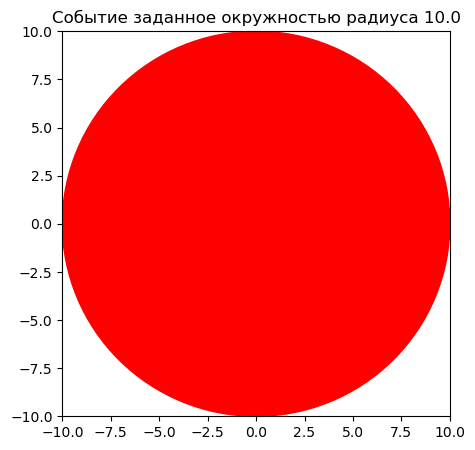

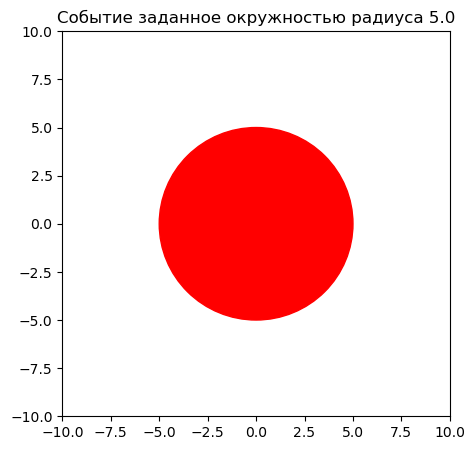

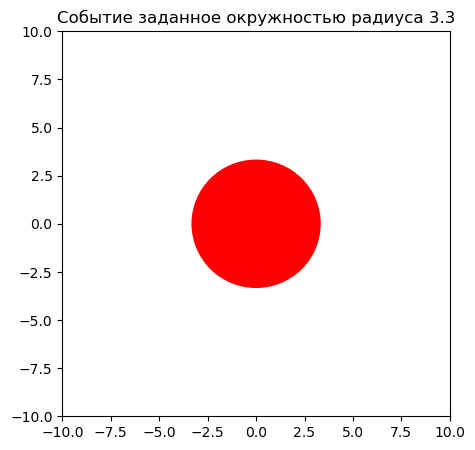

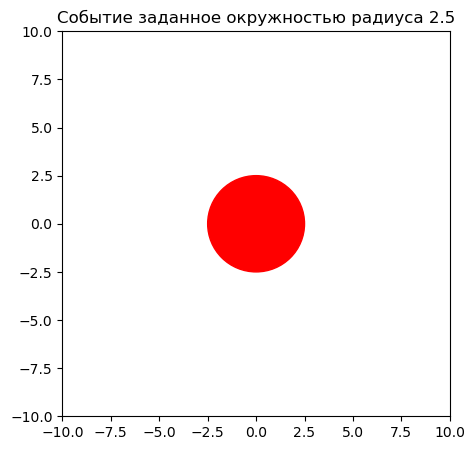

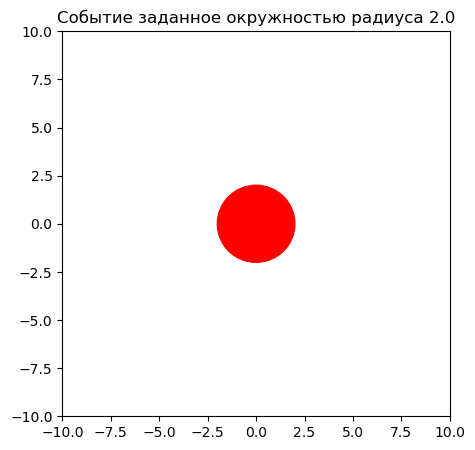

In [31]:
a = 10  # половина стороны квадрата элементарных исходов
r = [round(a / (k + 1), 1) for k in range(5)]  # радиусы кругов

for r_c in r:
    plt.figure(figsize=(5, 5))
    plt.title(f'Событие заданное окружностью радиуса {r_c}')
    plt.xlim(-a, a)
    plt.ylim(-a, a)
    circle = plt.Circle((0, 0), r_c, color='r', fill=True)
    plt.gca().add_artist(circle)
    plt.show()


In [32]:
def geometric_probability(r, a):
    return (np.pi * r ** 2  # площадь круга
            / ((2 * a) ** 2))  # площадь квадрата


print('Геометрическая вероятность события для различных радиусов кругов:')
for r_c in r:
    print(f'радиуса {r_c} - {geometric_probability(r_c, a)}')


Геометрическая вероятность события для различных радиусов кругов:
радиуса 10.0 - 0.7853981633974483
радиуса 5.0 - 0.19634954084936207
радиуса 3.3 - 0.0855298599939821
радиуса 2.5 - 0.04908738521234052
радиуса 2.0 - 0.031415926535897934


Проверка принадлежности точки событию:


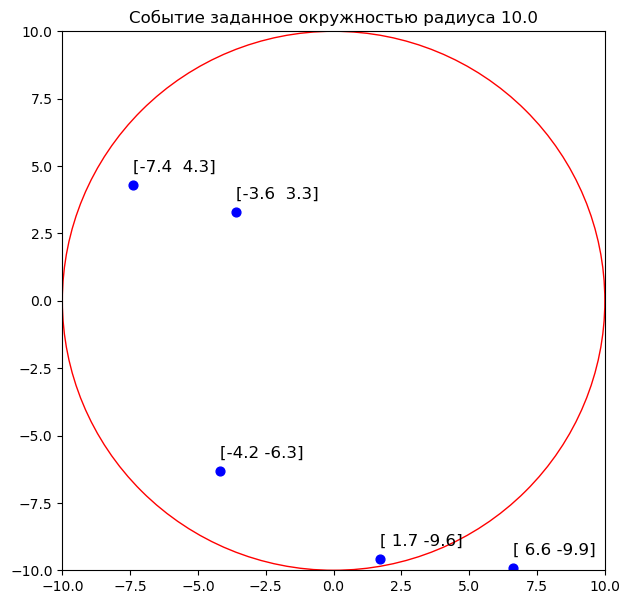

Точка [-3.6  3.3] принадлежит событию
Точка [-7.4  4.3] принадлежит событию
Точка [-4.2 -6.3] принадлежит событию
Точка [ 1.7 -9.6] принадлежит событию
Точка [ 6.6 -9.9] не принадлежит событию



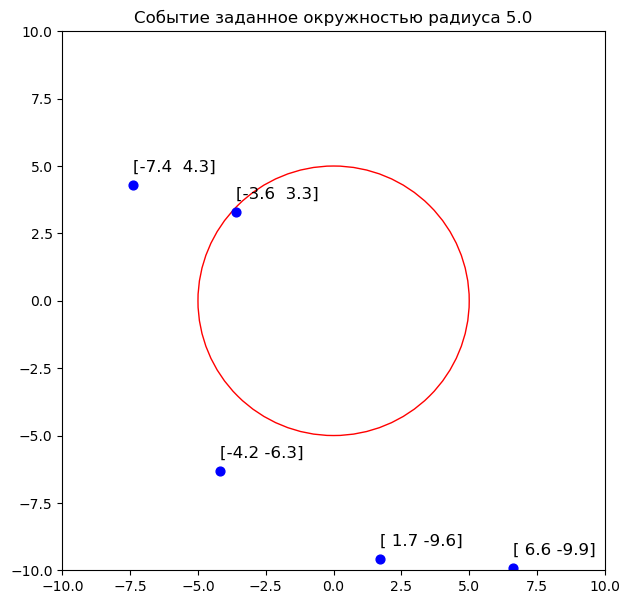

Точка [-3.6  3.3] принадлежит событию
Точка [-7.4  4.3] не принадлежит событию
Точка [-4.2 -6.3] не принадлежит событию
Точка [ 1.7 -9.6] не принадлежит событию
Точка [ 6.6 -9.9] не принадлежит событию



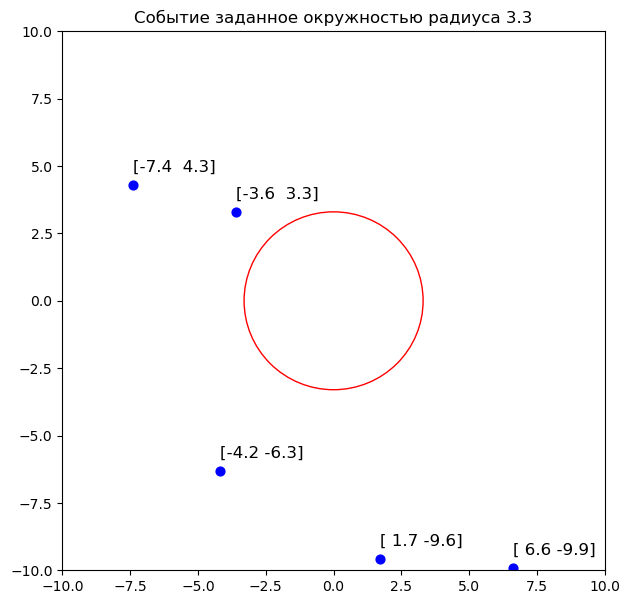

Точка [-3.6  3.3] не принадлежит событию
Точка [-7.4  4.3] не принадлежит событию
Точка [-4.2 -6.3] не принадлежит событию
Точка [ 1.7 -9.6] не принадлежит событию
Точка [ 6.6 -9.9] не принадлежит событию



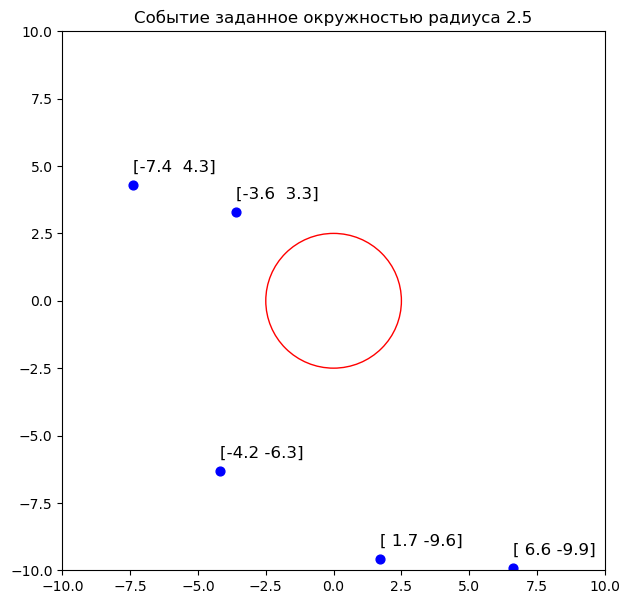

Точка [-3.6  3.3] не принадлежит событию
Точка [-7.4  4.3] не принадлежит событию
Точка [-4.2 -6.3] не принадлежит событию
Точка [ 1.7 -9.6] не принадлежит событию
Точка [ 6.6 -9.9] не принадлежит событию



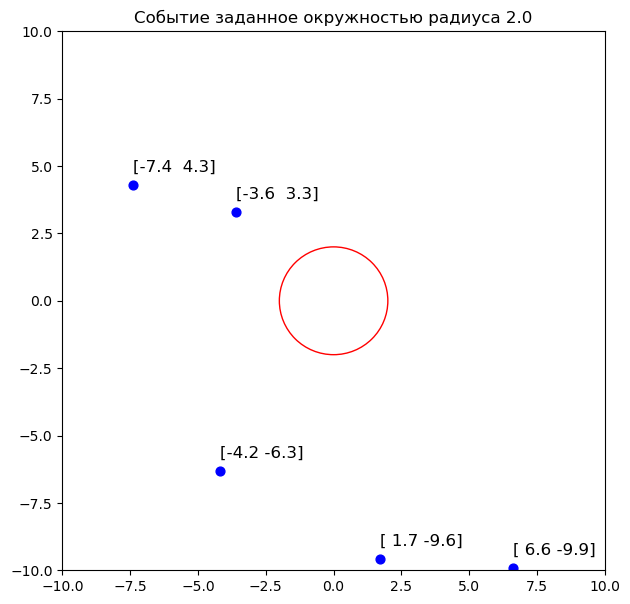

Точка [-3.6  3.3] не принадлежит событию
Точка [-7.4  4.3] не принадлежит событию
Точка [-4.2 -6.3] не принадлежит событию
Точка [ 1.7 -9.6] не принадлежит событию
Точка [ 6.6 -9.9] не принадлежит событию



In [42]:
points = np.random.uniform(-a, a, (5, 2))  # 5 случайных точек в пределах квадрата
points = np.round(points, 1)  # округление координат точек до 1 знака после запятой


def in_circle(r, point):
    return point[0] ** 2 + point[1] ** 2 <= r ** 2  # проверка попадания точки в круг с помощью уравнения окружности


print('Проверка принадлежности точки событию:')
for r_c in r:
    plt.figure(figsize=(7, 7))
    plt.title(f'Событие заданное окружностью радиуса {r_c}')
    plt.xlim(-a, a)
    plt.ylim(-a, a)
    circle = plt.Circle((0, 0), r_c, color='r', fill=False)
    plt.gca().add_artist(circle)
    for point in points:
        plt.scatter(point[0], point[1], color='b', s=40)
        plt.text(point[0], point[1] + 0.5, f'{point}', fontsize=12)
    plt.show()

    for point in points:
        if in_circle(r_c, point):
            print(f'Точка {point} принадлежит событию')
        else:
            print(f'Точка {point} не принадлежит событию')
    print()


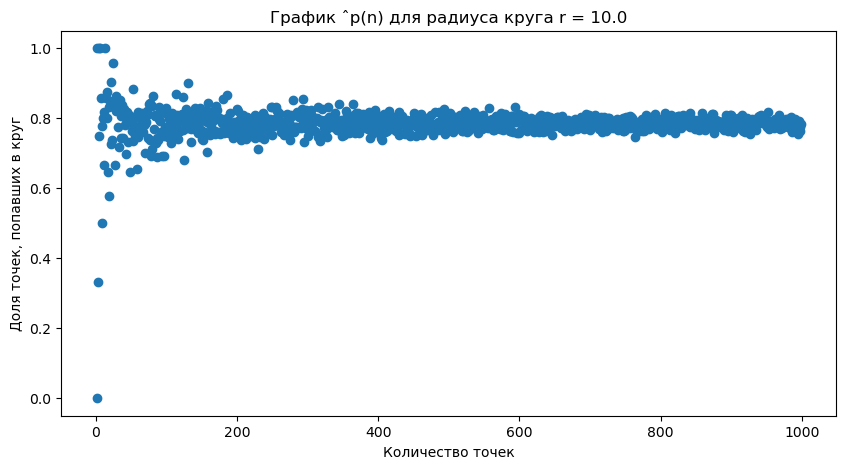

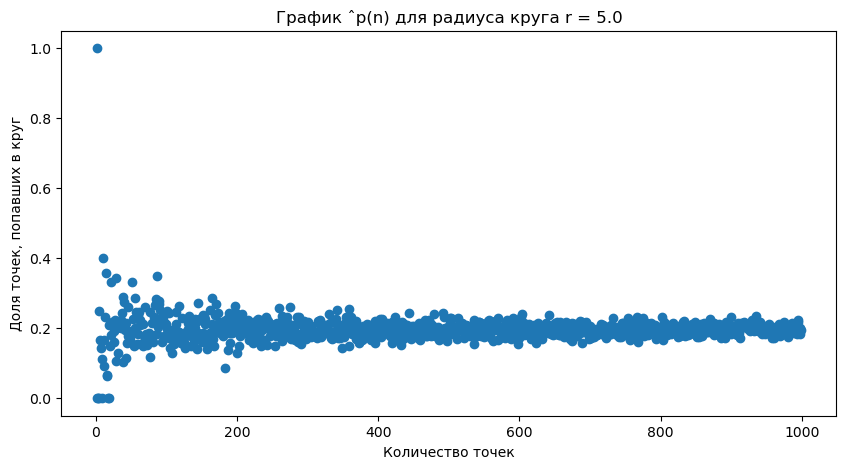

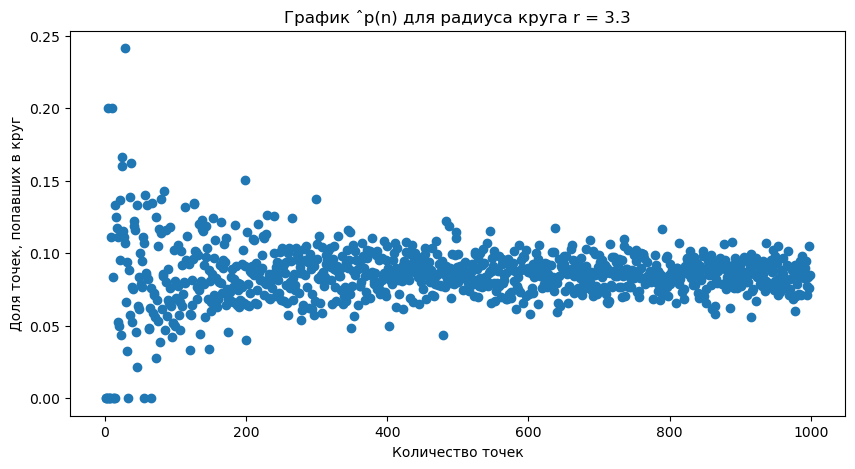

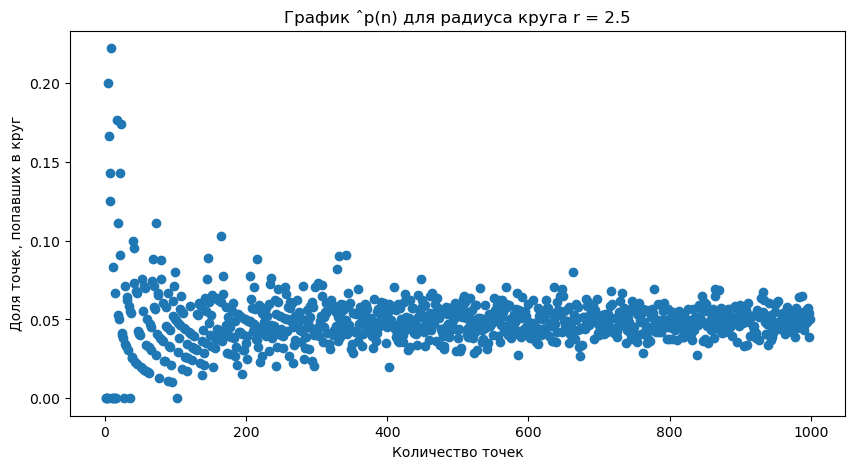

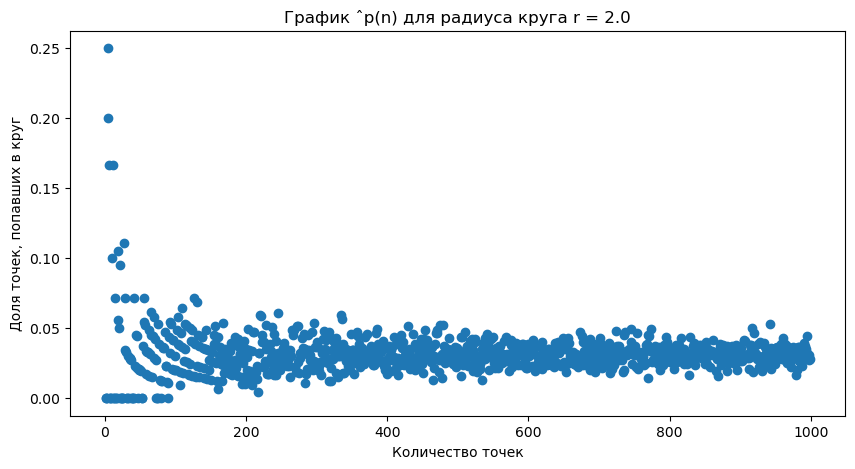

In [45]:
def points_in_circle_ratio(n, r, a):  # доля точек из n, попавших в круг
    points = np.random.uniform(-a, a, (n, 2))  # n случайных точек в пределах квадрата
    in_circle_points = 0  # количество точек, попавших в круг
    for point in points:
        if in_circle(r, point):  # проверка попадания точки в круг
            in_circle_points += 1
    return in_circle_points / n  # доля точек, попавших в круг


for r_c in r:
    ns = range(1, 1000)
    p = [points_in_circle_ratio(n, r_c, a) for n in ns]

    plt.figure(figsize=(10, 5))
    plt.scatter(ns, p, label='ˆp(n)')
    plt.xlabel('Количество точек')
    plt.ylabel('Доля точек, попавших в круг')
    plt.title(f'График ˆp(n) для радиуса круга r = {r_c}')
    plt.show()


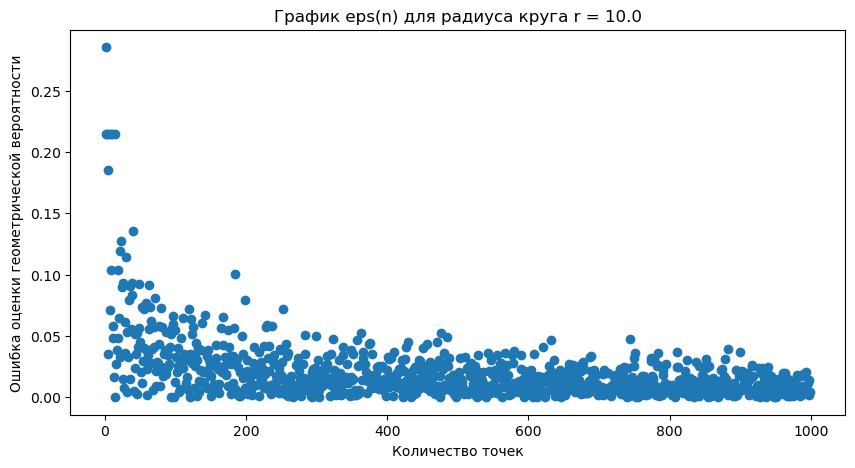

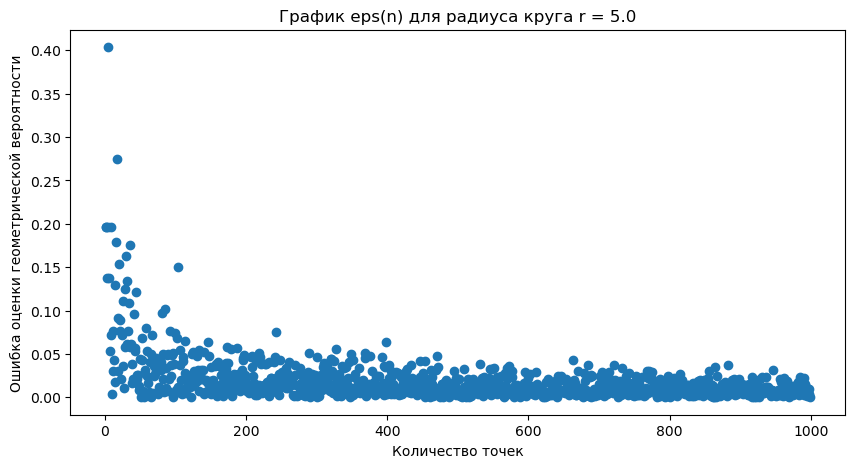

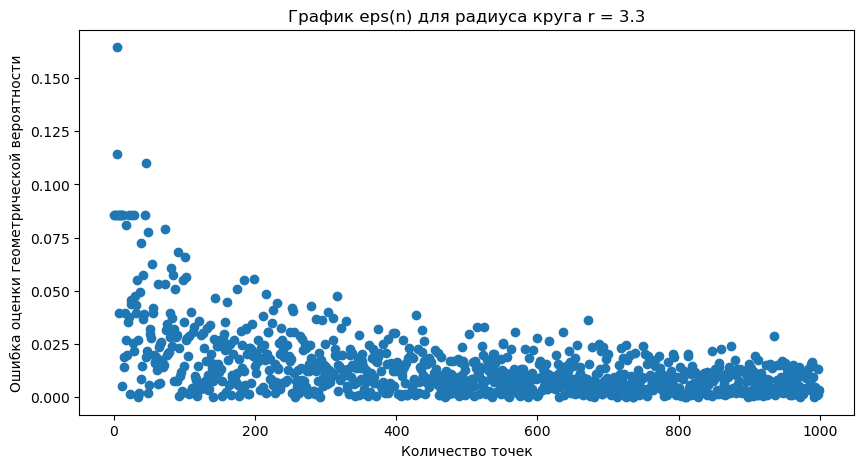

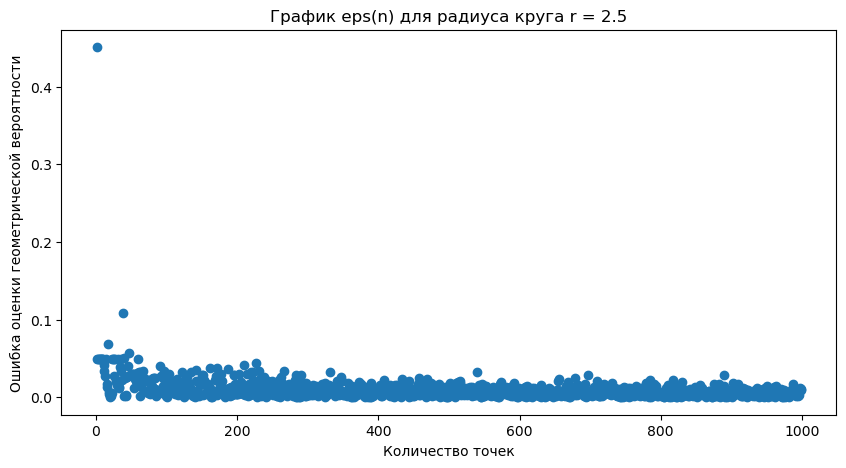

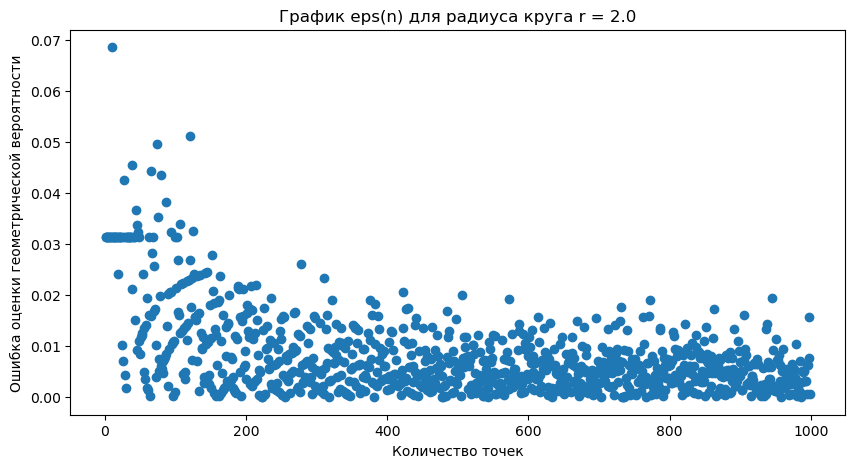

In [46]:
def error_in_circle_ratio(n, r, a):
    return np.abs(points_in_circle_ratio(n, r, a) - geometric_probability(r, a))


for r_c in r:
    ns = np.arange(1, 1000)
    e = [error_in_circle_ratio(n, r_c, a) for n in ns]

    plt.figure(figsize=(10, 5))
    plt.scatter(ns, e)
    plt.xlabel('Количество точек')
    plt.ylabel('Ошибка оценки геометрической вероятности')
    plt.title(f'График eps(n) для радиуса круга r = {r_c}')
    plt.show()


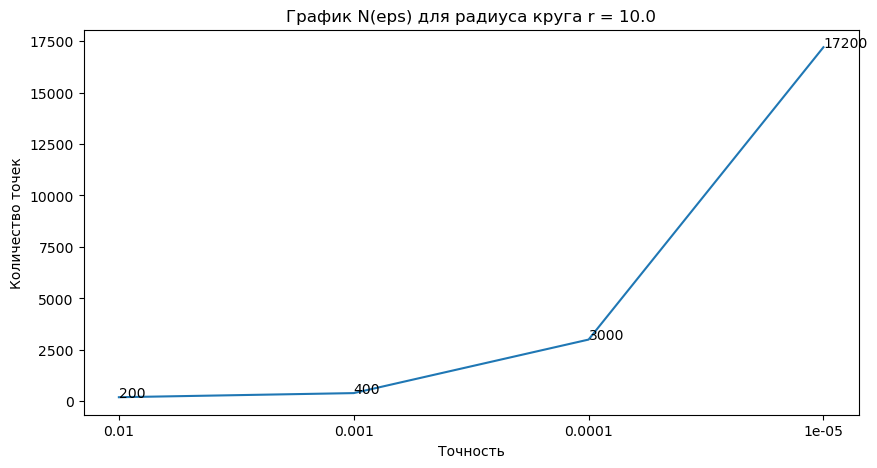

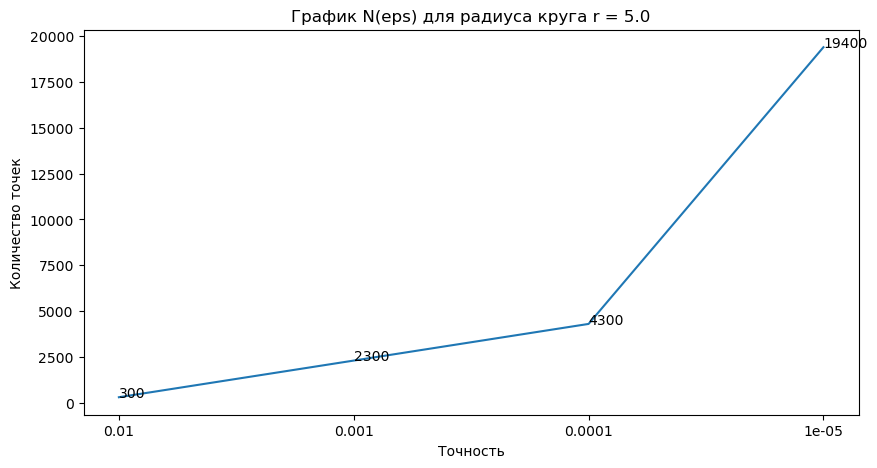

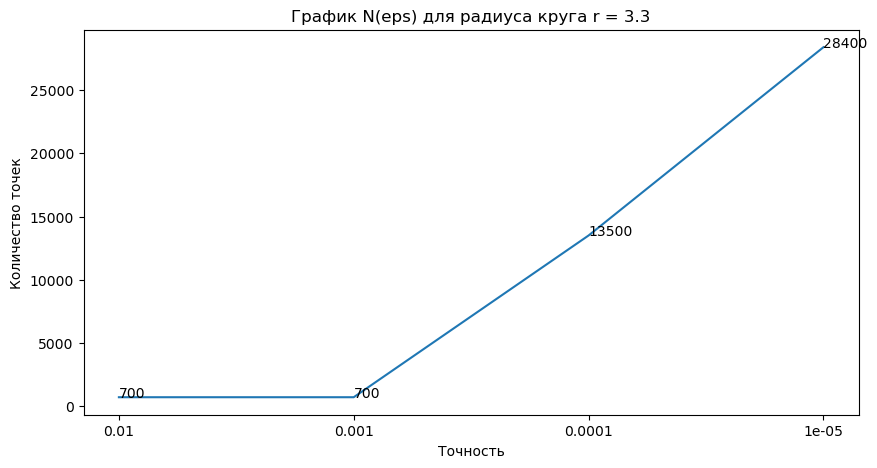

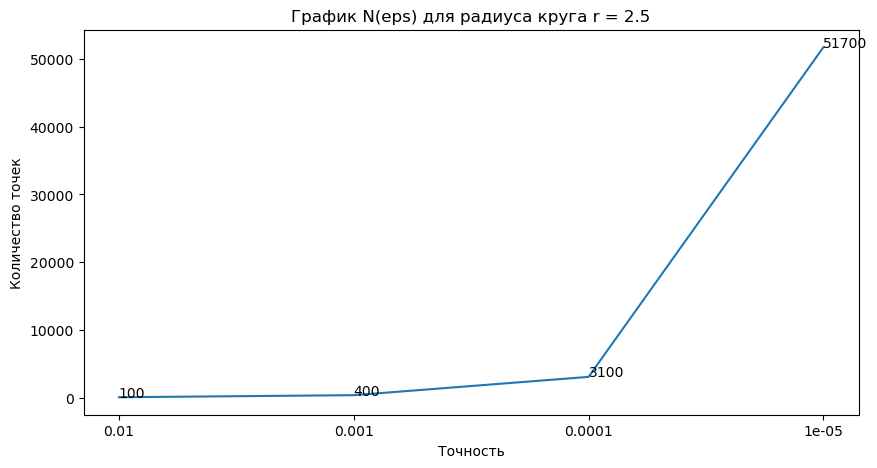

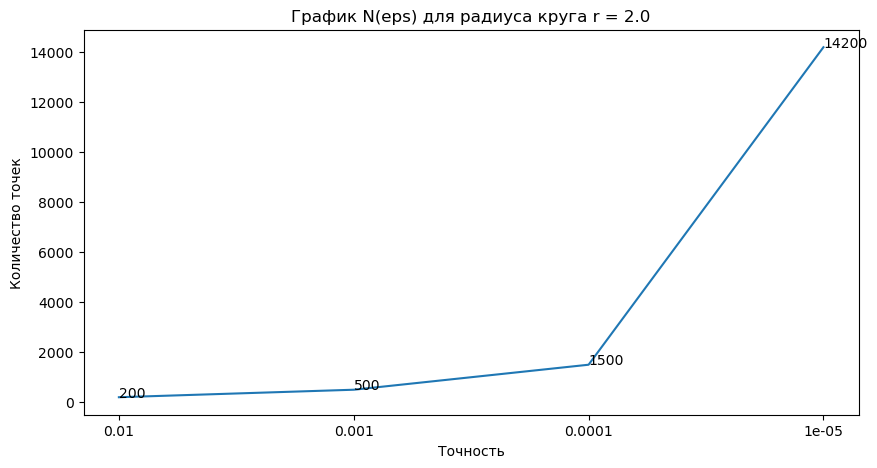

In [70]:
eps = [0.01, 0.001, 0.0001, 0.00001]
eps_string = [f'{e}' for e in eps]


def find_n_for_eps(eps, s, r, a): # нахождение N для заданной точности и шага
    N = s
    while error_in_circle_ratio(N, r, a) > eps:
        N += s
    return N


for r_c in r:
    ns = [find_n_for_eps(e, 100, r_c, a) for e in eps]

    plt.figure(figsize=(10, 5))
    plt.plot(eps_string, ns)
    for point in zip(eps_string, ns):
        plt.text(point[0], point[1], f'{point[1]}', fontsize=10)
    plt.xlabel('Точность')
    plt.ylabel('Количество точек')
    plt.title(f'График N(eps) для радиуса круга r = {r_c}')
    plt.show()


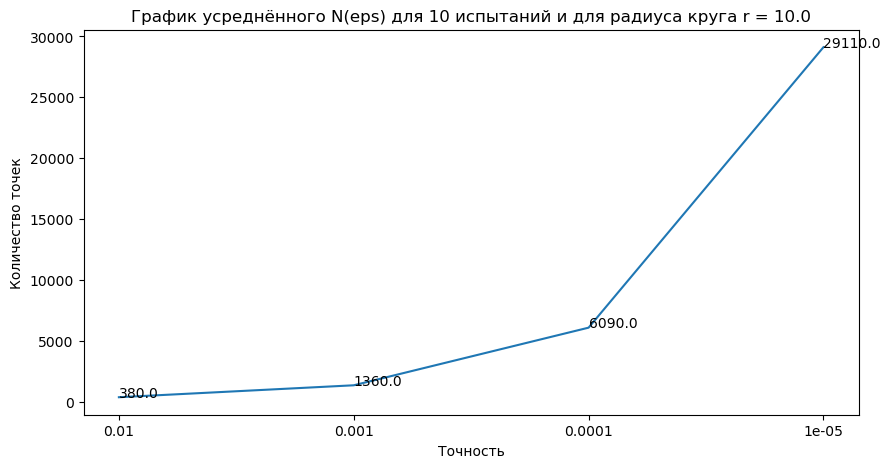

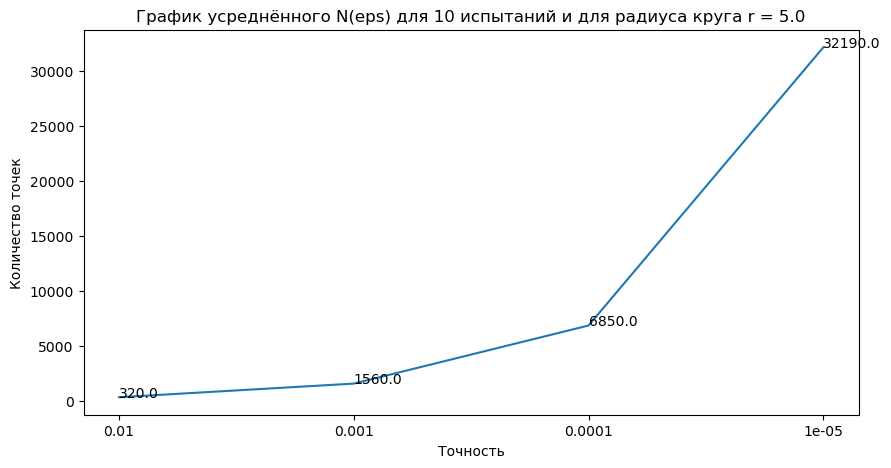

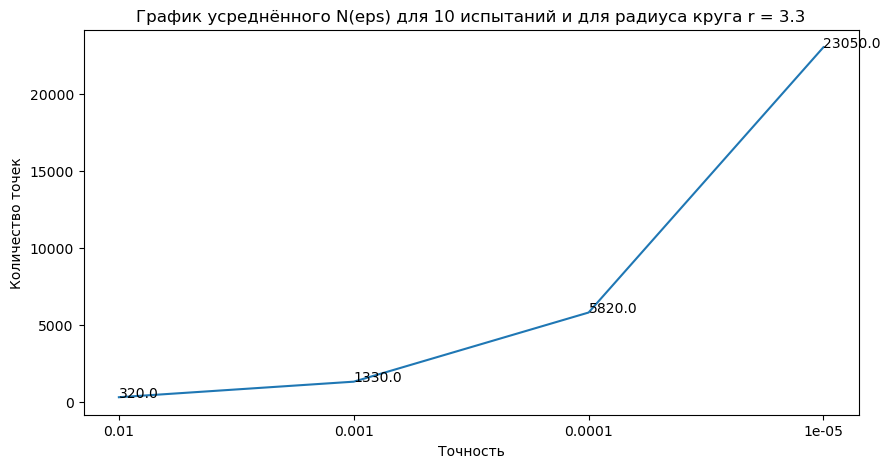

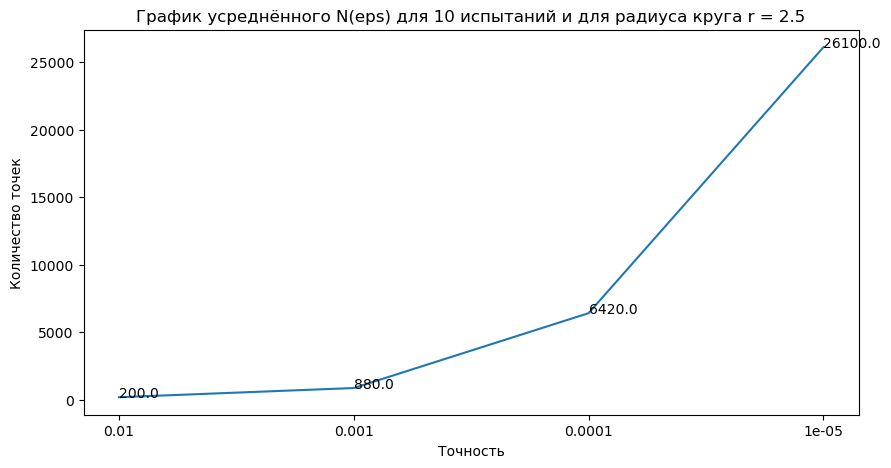

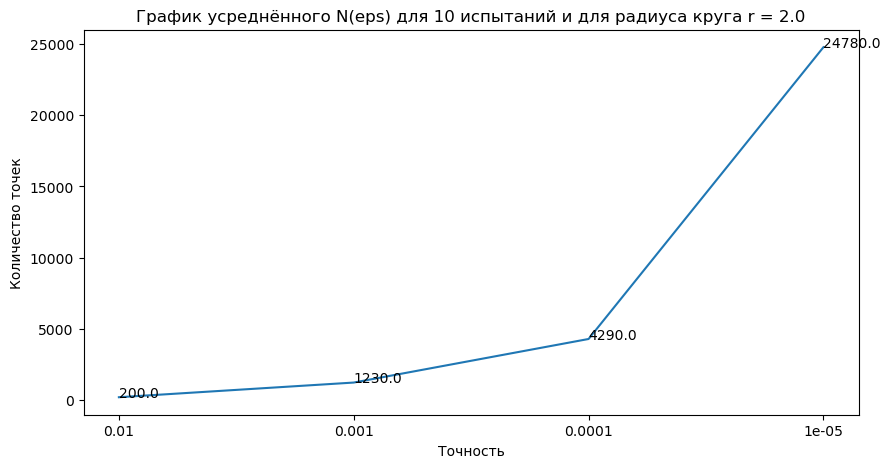

In [79]:
for r_c in r:
    ns = [sum([find_n_for_eps(e, 100, r_c, a) for _ in range(10)]) / 10 for e in eps]

    plt.figure(figsize=(10, 5))
    plt.plot(eps_string, ns)
    for point in zip(eps_string, ns):
        plt.text(point[0], point[1], f'{point[1]}', fontsize=10)
    plt.xlabel('Точность')
    plt.ylabel('Количество точек')
    plt.title(f'График усреднённого N(eps) для 10 испытаний и для радиуса круга r = {r_c}')
    plt.show()
